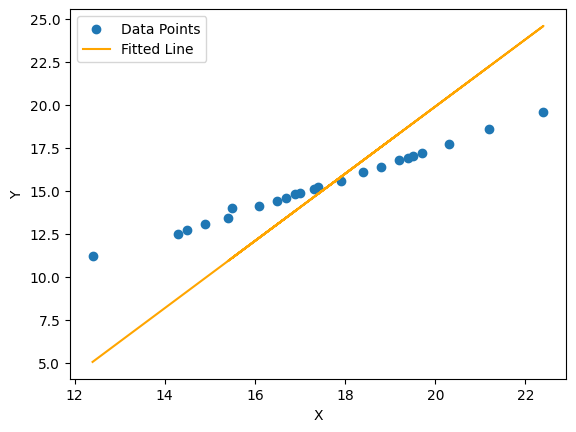

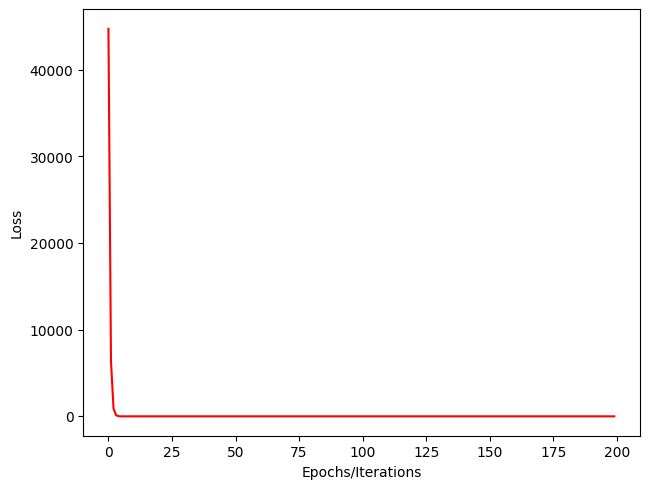

In [3]:
# question 1
import torch
import matplotlib.pyplot as plt

X = torch.tensor([12.4, 14.3, 14.5, 14.9, 16.1, 16.9, 16.5, 15.4, 17.0, 17.9, 18.8, 20.3, 22.4,
                  19.4, 15.5, 16.7, 17.3, 18.4, 19.2, 17.4, 19.5, 19.7, 21.2])

Y = torch.tensor([11.2, 12.5, 12.7, 13.1, 14.1, 14.8, 14.4, 13.4, 14.9, 15.6, 16.4, 17.7, 19.6,
                  16.9, 14.0, 14.6, 15.1, 16.1, 16.8, 15.2, 17.0, 17.2, 18.6])

w = torch.tensor(-10.0, requires_grad=True)
b = torch.tensor(-20.0, requires_grad=True)

def forward(x):
    return w * x + b

# mse
def criterion(Y_pred, y):
    return torch.mean((Y_pred - y) ** 2)

step_size = 0.001
loss_list = []
iter = 200

for i in range(iter):
    Y_pred = forward(X)
    loss = criterion(Y_pred, Y)
    loss_list.append(loss.item())
    loss.backward()
    w.data = w.data - step_size * w.grad.data
    b.data = b.data - step_size * b.grad.data

    # necesary otherwise the gradients from previous iterations will be added to the gradients computed in the current iteration
    w.grad.data.zero_()
    b.grad.data.zero_()

Y_pred_final = forward(X)

plt.scatter(X.numpy(), Y.numpy(), label='Data Points')
plt.plot(X.numpy(), Y_pred_final.detach().numpy(), color='orange', label='Fitted Line')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()


plt.plot(loss_list, 'r')
plt.tight_layout()
plt.xlabel("Epochs/Iterations")
plt.ylabel("Loss")
plt.show()

In [2]:
# question 2

Epoch 1:
  w.grad: -174.0
  b.grad: -52.0
  Updated w: 1.1740000247955322
  Updated b: 1.0520000457763672
----------------------------------------
Epoch 2:
  w.grad: -170.20799255371094
  b.grad: -50.85199737548828
  Updated w: 1.344208002090454
  Updated b: 1.1028521060943604
----------------------------------------
Epoch 3:
  w.grad: -166.4987335205078
  b.grad: -49.72904968261719
  Updated w: 1.5107067823410034
  Updated b: 1.1525812149047852
----------------------------------------
Epoch 4:
  w.grad: -162.87037658691406
  b.grad: -48.63059616088867
  Updated w: 1.6735771894454956
  Updated b: 1.2012118101119995
----------------------------------------
Epoch 5:
  w.grad: -159.32119750976562
  b.grad: -47.556114196777344
  Updated w: 1.8328983783721924
  Updated b: 1.2487679719924927
----------------------------------------
Epoch 6:
  w.grad: -155.84942626953125
  b.grad: -46.50507354736328
  Updated w: 1.9887478351593018
  Updated b: 1.2952730655670166
------------------------------

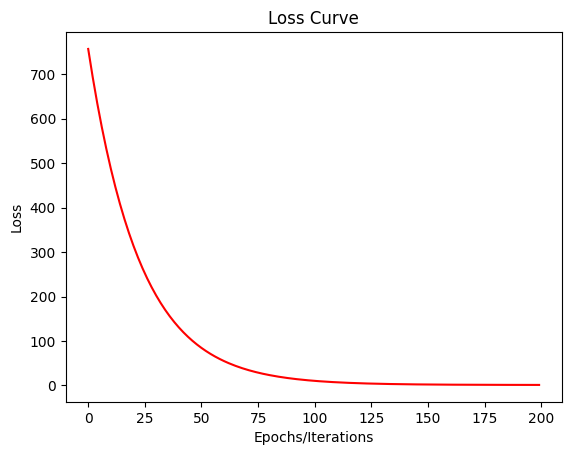

In [ ]:
X = torch.tensor([2,4])

Y = torch.tensor([20,40])

w = torch.tensor(1.0, requires_grad=True)
b = torch.tensor(1.0, requires_grad=True)

step_size = 0.001
epochs = 200
loss_list = []

for epoch in range(epochs):
    Y_pred = w * X + b

    loss = torch.mean((Y_pred - Y) ** 2)
    loss_list.append(loss.item())

    loss.backward()

    print(f"Epoch {epoch + 1}:")
    print(f"  w.grad: {w.grad.item()}")
    print(f"  b.grad: {b.grad.item()}")  

    with torch.no_grad():
        w -= step_size * w.grad
        b -= step_size * b.grad

    w.grad.zero_()
    b.grad.zero_()

    print(f"  Updated w: {w.item()}")
    print(f"  Updated b: {b.item()}")
    print('-' * 40)

plt.plot(loss_list, 'r')
plt.xlabel("Epochs/Iterations")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.show()


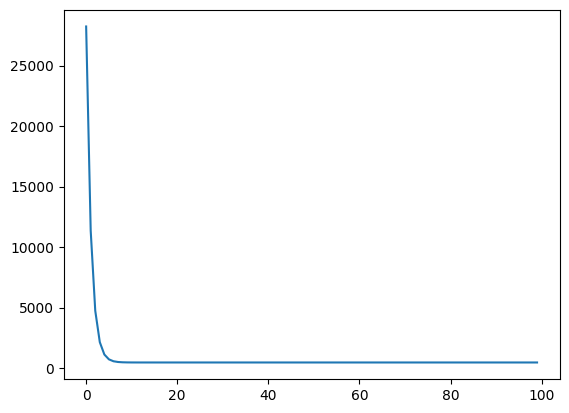

In [5]:
#question 3
x = torch.tensor([5.0, 7.0, 12.0, 16.0, 20.0])
y = torch.tensor([40.0, 120.0, 180.0, 210.0, 240.0])
lr = torch.tensor(0.001)

class RegressionModel:
    def __init__(self):
        self.w = torch.rand([1], requires_grad=True)
        self.b = torch.rand([1], requires_grad=True)

    def forward(self, x):
        return self.w*x+ self.b

    def update(self):
        self.w -= lr*self.w.grad
        self.b -= lr*self.w.grad

    def reset_grad(self):
        self.w.grad.zero_()
        self.b.grad.zero_()

def criterion(yj,y_p):
    return (yj - y_p)**2

model = RegressionModel()

loss_list = []
for epochs in range(100):
    loss = 0
    for j in range(len(x)):
        y_p = model.forward(x[j])
        loss += criterion(y[j],y_p)
    loss = loss/len(x)
    loss_list.append(loss.item())

    loss.backward()

    with torch.no_grad():
        model.update()

    model.reset_grad()

plt.plot(loss_list)
plt.show()

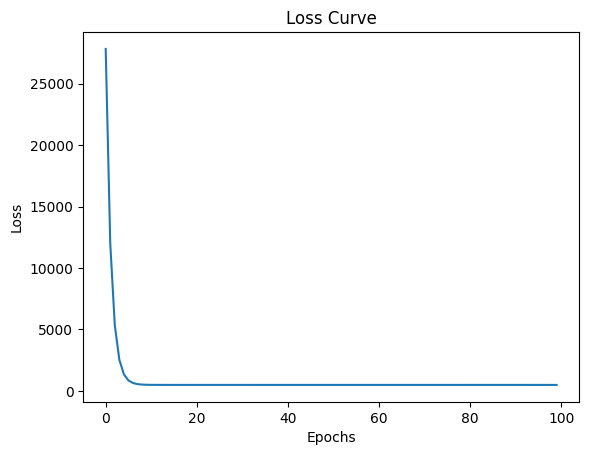

Learned weight: 12.96743106842041
Learned bias: 0.45217832922935486


In [6]:
#question 4
import torch.nn as nn
import torch.optim as optim

x = torch.tensor([5.0, 7.0, 12.0, 16.0, 20.0]).view(-1, 1)  # Reshaped for NN input
y = torch.tensor([40.0, 120.0, 180.0, 210.0, 240.0]).view(-1, 1)

class RegressionModel(nn.Module):
    def __init__(self):
        super(RegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1) 

    def forward(self, x):
        return self.linear(x)

model = RegressionModel()

criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

loss_list = []

for epoch in range(100):
    model.train()

    # Forward pass
    y_pred = model(x)
    loss = criterion(y_pred, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    loss_list.append(loss.item())

plt.plot(loss_list)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()

print("Learned weight:", model.linear.weight.item())
print("Learned bias:", model.linear.bias.item())

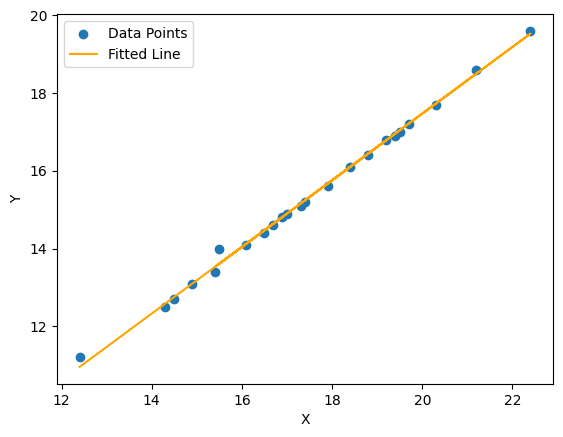

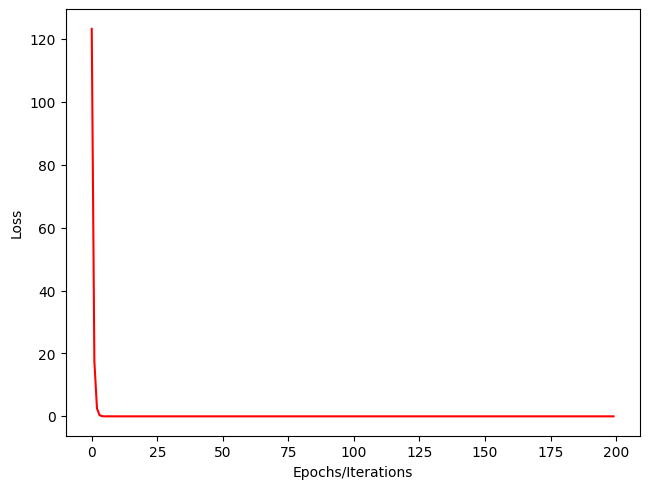

Learned weight (w): 0.8576590418815613
Learned bias (b): 0.3187260925769806


In [7]:
#question 5
X = torch.tensor([12.4, 14.3, 14.5, 14.9, 16.1, 16.9, 16.5, 15.4, 17.0, 17.9, 18.8, 20.3, 22.4,
                  19.4, 15.5, 16.7, 17.3, 18.4, 19.2, 17.4, 19.5, 19.7, 21.2]).view(-1, 1)  # Reshape for NN input
Y = torch.tensor([11.2, 12.5, 12.7, 13.1, 14.1, 14.8, 14.4, 13.4, 14.9, 15.6, 16.4, 17.7, 19.6,
                  16.9, 14.0, 14.6, 15.1, 16.1, 16.8, 15.2, 17.0, 17.2, 18.6]).view(-1, 1)  # Reshape for NN output

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1) #y = wx + b

    def forward(self, x):
        return self.linear(x)

model = LinearRegressionModel()

criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)
loss_list = []

for epoch in range(200):
    model.train()

    Y_pred = model(X)
    loss = criterion(Y_pred, Y)
    optimizer.zero_grad()
    loss.backward()

    optimizer.step()
    loss_list.append(loss.item())

Y_pred_final = model(X).detach()

plt.scatter(X.numpy(), Y.numpy(), label='Data Points')
plt.plot(X.numpy(), Y_pred_final.numpy(), color='orange', label='Fitted Line')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

plt.plot(loss_list, 'r')
plt.tight_layout()
plt.xlabel("Epochs/Iterations")
plt.ylabel("Loss")
plt.show()

print("Learned weight (w):", model.linear.weight.item())
print("Learned bias (b):", model.linear.bias.item())


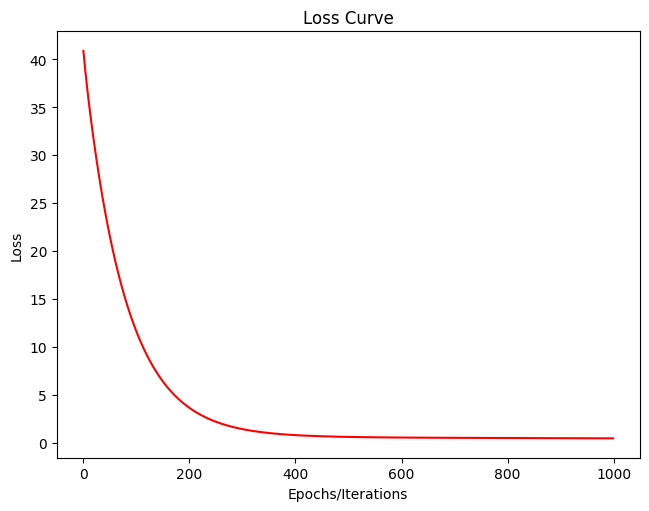

Learned weight (w): Parameter containing:
tensor([[ 2.6460, -1.5600]], requires_grad=True)
Learned bias (b): Parameter containing:
tensor([0.6092], requires_grad=True)


In [8]:
#question 6
X1 = torch.tensor([3, 4, 5, 6, 2]).view(-1, 1).float()
X2 = torch.tensor([8, 5, 7, 3, 1]).view(-1, 1).float()
Y = torch.tensor([-3.7, 3.5, 2.5, 11.5, 5.7]).view(-1, 1).float()
iters = 1000

X = torch.cat((X1, X2), dim=1)

class MLR(nn.Module):
    def __init__(self):
        super(MLR, self).__init__()
        self.linear = nn.Linear(2, 1)  # 2 in features, 1 output

    def forward(self, x):
        return self.linear(x)

model = MLR()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

loss_list = []
for epoch in range(iters):
    model.train()

    Y_pred = model(X)
    loss = criterion(Y_pred, Y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    loss_list.append(loss.item())

plt.plot(loss_list, 'r')
plt.tight_layout()
plt.xlabel("Epochs/Iterations")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.show()

print("Learned weight (w):", model.linear.weight)
print("Learned bias (b):", model.linear.bias)


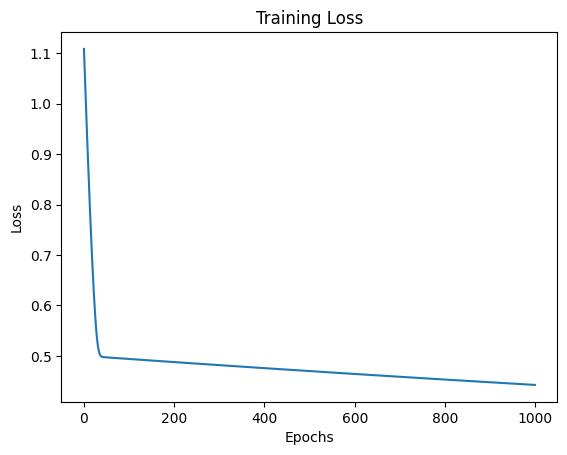

Learned weight (w): 0.03534387797117233
Learned bias (b): -0.3631397783756256
Predicted probability for input 30: 0.6676


In [9]:
#question 7
X = torch.tensor([1, 5, 10, 10, 25, 50, 70, 75, 100]).view(-1, 1).float()  # Features
y = torch.tensor([0, 0, 0, 0, 0, 1, 1, 1, 1]).view(-1, 1).float()  # Target labels

class LogisticRegression(nn.Module):
    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))  # sigmoid activation


model = LogisticRegression()
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)
loss_list = []

# Training loop
epochs = 1000
for epoch in range(epochs):
    model.train()

    y_pred = model(X)
    loss = criterion(y_pred, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


    loss_list.append(loss.item())

plt.plot(loss_list)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

with torch.no_grad():
    y_pred_final = model(X)


print("Learned weight (w):", model.linear.weight.item())
print("Learned bias (b):", model.linear.bias.item())

test_input = torch.tensor([[30.0]]).float()
predicted_prob = model(test_input).item()
print(f"Predicted probability for input 30: {predicted_prob:.4f}")
